### Measuring the Correlation of Various Sleep Metrics by Age and Gender

In [87]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set plt style
plt.style.use('tableau-colorblind10')

In [88]:
# Import data into a dataframe
sleep_df = pd.read_csv('Resources/Sleep_Efficiency.csv')
sleep_df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,3/6/2021 1:00,3/6/2021 7:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,12/5/2021 2:00,12/5/2021 9:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,5/25/2021 21:30,5/25/2021 5:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,11/3/2021 2:30,11/3/2021 8:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,3/13/2021 1:00,3/13/2021 9:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [89]:
# Remove columns that are not needed
sleep_df = sleep_df.iloc[:, :-5]
sleep_df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage
0,1,65,Female,3/6/2021 1:00,3/6/2021 7:00,6.0,0.88,18,70,12
1,2,69,Male,12/5/2021 2:00,12/5/2021 9:00,7.0,0.66,19,28,53
2,3,40,Female,5/25/2021 21:30,5/25/2021 5:30,8.0,0.89,20,70,10
3,4,40,Female,11/3/2021 2:30,11/3/2021 8:30,6.0,0.51,23,25,52
4,5,57,Male,3/13/2021 1:00,3/13/2021 9:00,8.0,0.76,27,55,18


#### Statistical Snapshot of the Data
<!-- - the data covers a diverse range of values which will help us draw realiable conclusions from our analysis -->
<!-- - ages range from 9 to 69, average age is 40.3 
- average sleep duration is 7.5 hours, minimum of 5 hours and maximum of 10 hours
- sleep efficiency ranges from 50% to 99%, average is 78.9%
- REM sleep ranges from 15% to 30%, average is 22.6%
- deep sleep ranges from 18% to 75%, average is 52.8 percent
- light sleep ranges from 7% to 63%, average is 24.6% -->

In [90]:
sleep_df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000


#### Average Sleep Metrics by Age Group
- sleep duration tends to decrease alightly with age
- sleep efficiency tends to increase with age
- REM sleep % increases through adolecense but remains fairly consistent through adulthood
- deep sleep % increases with age but peaks in the 40s and begins to decrease with age (oposite for light sleep)

In [91]:
# define the age groups
bins = [0, 9, 19, 29, 39, 49, 59, 69]
labels = ['< 10', '10s', '20s', '30s', '40s', '50s', '60s']
sleep_df['Age Group'] = pd.cut(sleep_df['Age'], bins=bins, labels=labels)

# group the data by age group
age_group_df = sleep_df.groupby('Age Group').mean().drop(['ID', 'Age'], axis=1)
age_group_df


,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage
Age Group,,,,,
< 10,8.500000,0.520000,18.000000,35.000000,47.000000
10s,7.906250,0.687500,19.312500,42.687500,38.000000
20s,7.415094,0.766509,22.924528,51.745283,25.330189
30s,7.568421,0.813474,23.084211,55.694737,21.221053
40s,7.367347,0.807347,22.397959,54.683673,22.918367
50s,7.392157,0.801569,22.656863,52.872549,24.470588
60s,7.602941,0.754706,22.529412,47.941176,29.529412


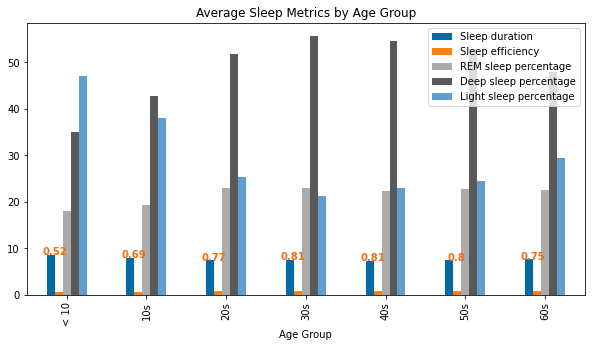

In [92]:
# Create a bar chart of sleep metrics by age group
age_group_df.plot(kind='bar', figsize=(10,5), title='Average Sleep Metrics by Age Group')

# add data labels only for 'Sleep efficiency'
for i in range(len(age_group_df)):
    plt.text(i, age_group_df.iloc[i, 0], round(age_group_df.iloc[i, 1], 2), color='#EE6E17', fontweight='bold', ha='right')


#### Visualizing the distribution of sleep metrics by age group (outliers?)

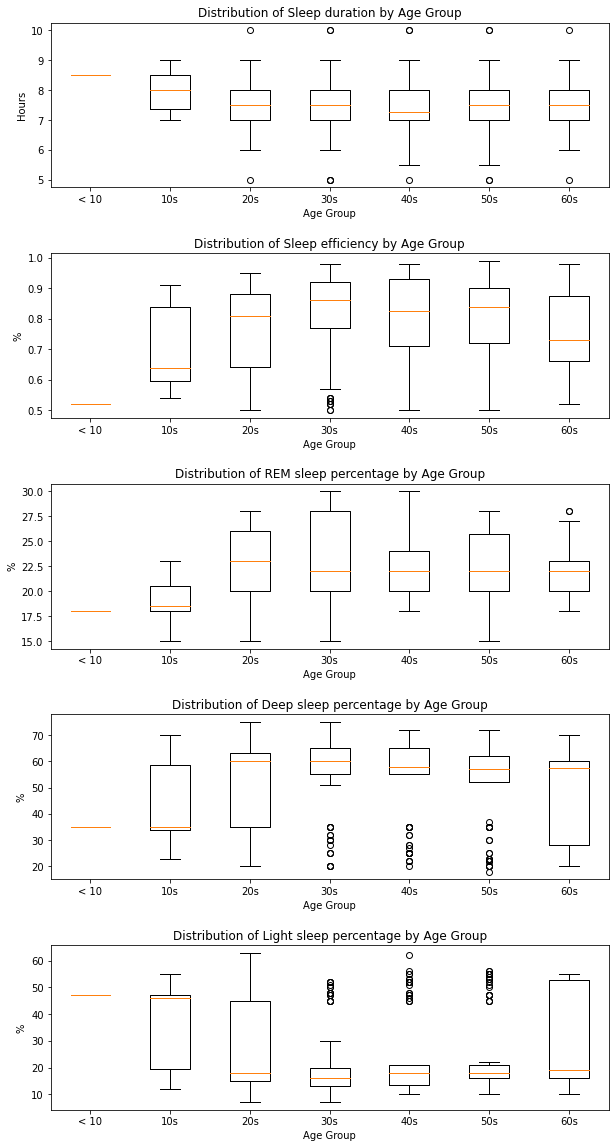

In [93]:
# boxplots to visualize the distribution of sleep metrics by age group and identify outliers

fig, axs = plt.subplots(ncols=1, nrows=5, figsize=(10, 20))
fig.subplots_adjust(hspace=0.4)

metrics = ['Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage']
age_groups = ['< 10', '10s', '20s', '30s', '40s', '50s', '60s']

for i, metric in enumerate(metrics):
    data = [sleep_df.loc[sleep_df['Age Group'] == age_group, metric] for age_group in age_groups]
    axs[i].set_title(f'Distribution of {metric} by Age Group')
    axs[i].set_ylabel('Hours' if metric == 'Sleep duration' else '%')
    axs[i].set_xlabel('Age Group')
    axs[i].boxplot(data, labels=age_groups)

plt.show()

#### Detailed Correlation of Sleep Metrics by Age Group

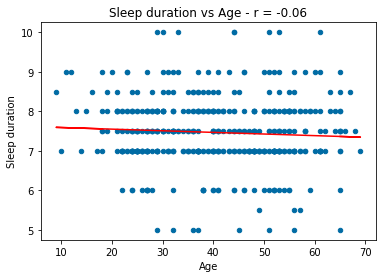

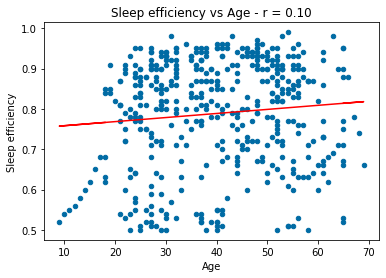

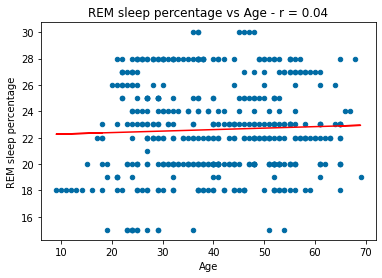

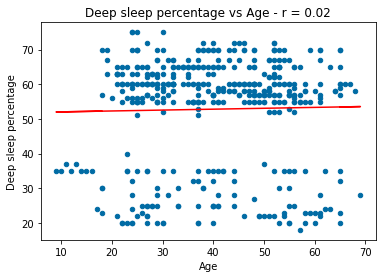

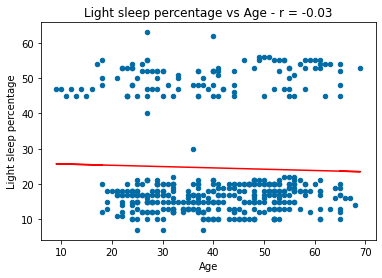

In [94]:
columns = ['Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage']

# plot the data for each column
for column in columns:
    sleep_df.plot.scatter(x='Age', y=column)
    
    r_value = sleep_df[['Age', column]].corr().iloc[0,1]
    plt.title(f'{column} vs Age - r = {r_value:.2f}')

    m, b = np.polyfit(sleep_df['Age'], sleep_df[column], 1)
    plt.plot(sleep_df['Age'], m * sleep_df['Age'] + b, color='red')
    
    plt.show()

# # Save the figure
# plt.savefig('Output/age_vs_sleep.png')

#### Average Sleep Metrics by Gender
- Solely based on the averages, there seems to be minimal differences in sleep metrics between genders
- However, averages may not represent each individual's sleep patterns, further analysis is need to draw more definitve conclusions

In [95]:
# group and average by gender
gender_group_df = sleep_df.groupby('Gender').mean().drop(['ID', 'Age'], axis=1)
gender_group_df

,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage
Gender,,,,,
Female,7.504464,0.787545,23.187500,51.625,25.187500
Male,7.427632,0.790263,22.052632,54.000,23.947368


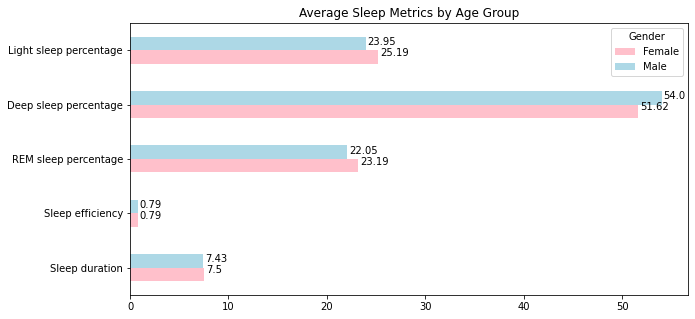

In [96]:
# Create a bar chart of sleep metrics by gender
# gender_group_df.T.plot(kind='barh', figsize=(10,5), title='Average Sleep Metrics by Age Group')
ax = gender_group_df.T.plot(kind='barh', figsize=(10,5), title='Average Sleep Metrics by Age Group', color=['pink', 'lightblue'])

# Add labels to the bars
for i, v in enumerate(gender_group_df.T.values):
    ax.text(v[0] + 0.2, i - 0.1, str(round(v[0], 2)), color='black')
    ax.text(v[1] + 0.2, i + 0.1, str(round(v[1], 2)), color='black')


#### Visualizing the distribution of sleep metrics by Gender (outliers?)

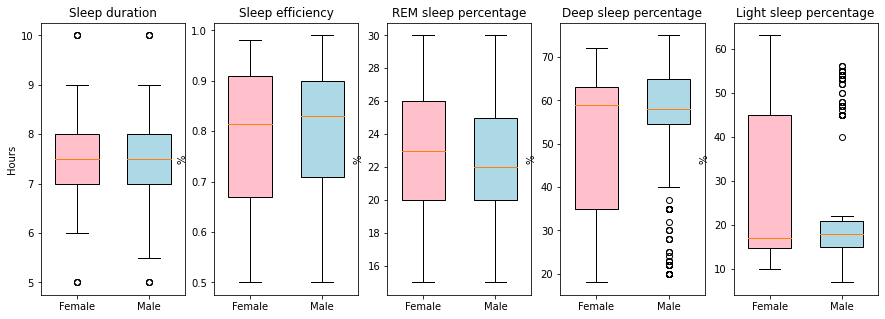

In [97]:
# boxplot to check or potential outliers

fig, axs = plt.subplots(ncols=5, figsize=(15,5))

for i, column in enumerate(columns):
    female_data = sleep_df[sleep_df['Gender'] == 'Female'][column]
    male_data = sleep_df[sleep_df['Gender'] == 'Male'][column]
    
    # Create boxplot
    bp = axs[i].boxplot([female_data, male_data], widths=0.6, patch_artist=True, labels=['Female', 'Male'])
    
    # Set colors for the boxes
    for patch, color in zip(bp['boxes'], ['pink', 'lightblue']):
        patch.set_facecolor(color)
    
    axs[i].set_title(column)
    axs[i].set_ylabel('Hours' if column == 'Sleep duration' else '%')

plt.show()

#### Detailed Correclation of Sleep Metrics by Gender
- The correlation coefficent for 


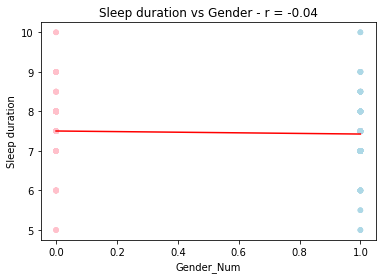

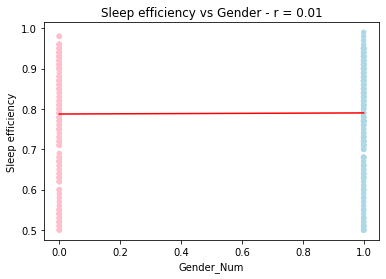

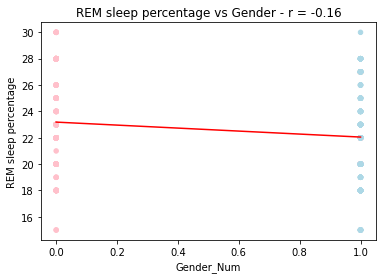

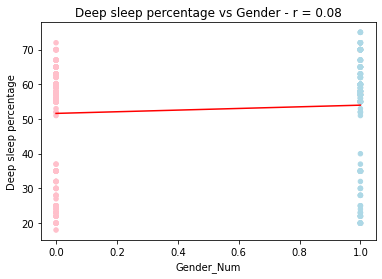

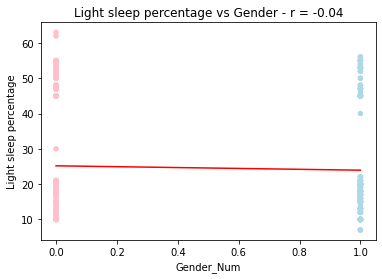

In [98]:
gender_dict = {'Female': 0, 'Male': 1}
sleep_df['Gender_Num'] = sleep_df['Gender'].map(gender_dict)
colors = ['pink' if gender == 'Female' else 'lightblue' for gender in sleep_df['Gender']]

columns = ['Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage']

# plot the data for each column
for column in columns:
    sleep_df.plot.scatter(x='Gender_Num', y=column, c=colors)
    
    r_value = sleep_df[['Gender_Num', column]].corr().iloc[0,1]
    plt.title(f'{column} vs Gender - r = {r_value:.2f}')

    m, b = np.polyfit(sleep_df['Gender_Num'], sleep_df[column], 1)
    plt.plot(sleep_df['Gender_Num'], m * sleep_df['Gender_Num'] + b, color='red')

    plt.show()